<a href="https://colab.research.google.com/github/yashpatil-1/Machine-Learning-LAB/blob/main/ML_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

df = pd.read_csv('/content/marriage_divorce_india_with_id.csv')


print("Dataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unique ID                     1200 non-null   object
 1   Marriage Duration (Years)     1200 non-null   int64 
 2   Age at Marriage               1200 non-null   int64 
 3   Marriage Type                 1200 non-null   object
 4   Education Level               1200 non-null   object
 5   Income Level (INR per month)  1200 non-null   int64 
 6   Caste/Religion                1200 non-null   object
 7   Urban/Rural                   1200 non-null   object
 8   Family Involvement            1200 non-null   object
 9   Children                      1200 non-null   int64 
 10  Divorce Status                1200 non-null   object
dtypes: int64(4), object(7)
memory usage: 103.3+ KB
None

Dataset Description:
       Marriage Duration (Years)  Age a

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unique ID                     1200 non-null   object
 1   Marriage Duration (Years)     1200 non-null   int64 
 2   Age at Marriage               1200 non-null   int64 
 3   Marriage Type                 1200 non-null   object
 4   Education Level               1200 non-null   object
 5   Income Level (INR per month)  1200 non-null   int64 
 6   Caste/Religion                1200 non-null   object
 7   Urban/Rural                   1200 non-null   object
 8   Family Involvement            1200 non-null   object
 9   Children                      1200 non-null   int64 
 10  Divorce Status                1200 non-null   object
dtypes: int64(4), object(7)
memory usage: 103.3+ KB
None

Dataset Description:
       Marriage Duration (Years)  Age a

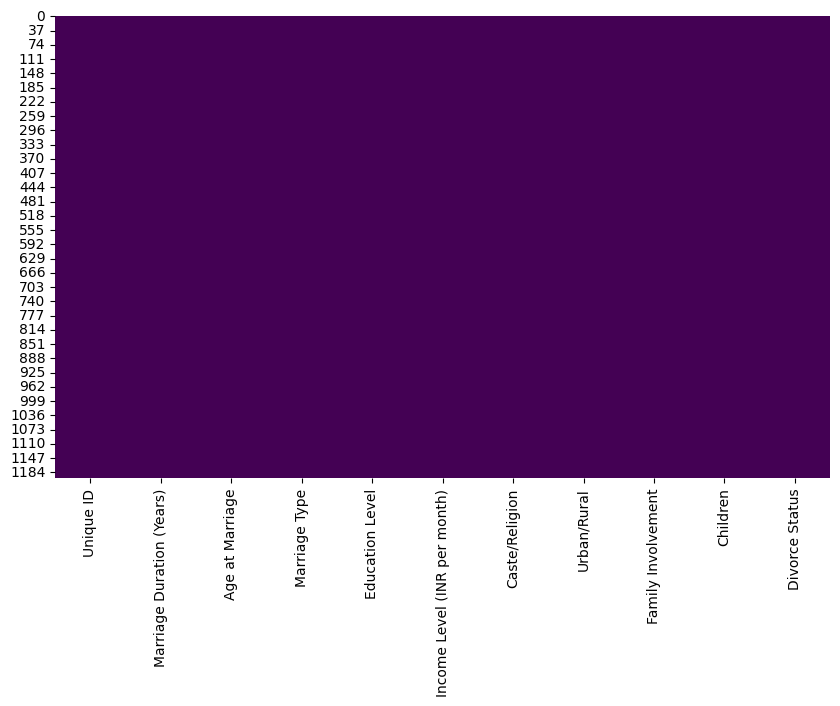

In [51]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

df = pd.read_csv('/content/marriage_divorce_india_with_id.csv')


print("Dataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])



In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = df.isnull().sum().sum()

if missing_values > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', annot=False, linewidths=0.5)
    plt.title("Missing Values Heatmap")
    plt.show()
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


In [54]:
# Verify the unique values in the columns before mapping
print("\nUnique values in 'Education Level' before mapping:")
print(df['Education Level'].unique())

print("\nUnique values in 'Marriage Type' before mapping:")
print(df['Marriage Type'].unique())

# Perform ordinal encoding
df['Education Level'] = df['Education Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Marriage Type'] = df['Marriage Type'].map({'Arranged': 0, 'Love': 1})

# Check for any unmapped or missing values
print("\nUnique values in 'Education Level' after mapping:")
print(df['Education Level'].unique())

print("\nUnique values in 'Marriage Type' after mapping:")
print(df['Marriage Type'].unique())

# Check for null values after mapping
missing_values = df[['Education Level', 'Marriage Type']].isnull().sum()

if missing_values.any():
    print(f"\nMissing values found after mapping: \n{missing_values}")
else:
    print("\nNo missing values in the mapped columns.")




Unique values in 'Education Level' before mapping:
[nan]

Unique values in 'Marriage Type' before mapping:
[1 0]

Unique values in 'Education Level' after mapping:
[nan]

Unique values in 'Marriage Type' after mapping:
[nan]

Missing values found after mapping: 
Education Level    1200
Marriage Type      1200
dtype: int64


In [55]:
# Check if the columns exist in the dataframe
if 'Caste/Religion' in df.columns and 'Urban/Rural' in df.columns:
    print("\nColumns found. Proceeding with one-hot encoding.")

    # Verify unique values in the columns before encoding
    print("\nUnique values in 'Caste/Religion':")
    print(df['Caste/Religion'].unique())

    print("\nUnique values in 'Urban/Rural':")
    print(df['Urban/Rural'].unique())

    # Perform one-hot encoding
    df = pd.get_dummies(df, columns=['Caste/Religion', 'Urban/Rural'], drop_first=True)

    # Display the first few rows of the dataframe after encoding
    print("\nDataframe after one-hot encoding:")
    print(df.head())

    # Check for any missing values in the newly created columns
    print("\nMissing values in the dataframe after encoding:")
    print(df.isnull().sum())
else:
    print("\nColumns 'Caste/Religion' or 'Urban/Rural' not found in the dataframe.")



Columns found. Proceeding with one-hot encoding.

Unique values in 'Caste/Religion':
['Hindu' 'Jain' 'Muslim' 'Christian' 'Other' 'Sikh']

Unique values in 'Urban/Rural':
['Rural' 'Urban']

Dataframe after one-hot encoding:
  Unique ID  Marriage Duration (Years)  Age at Marriage  Marriage Type  \
0       MD1                       39.0             29.0            NaN   
1       MD2                       29.0             34.0            NaN   
2       MD3                       15.0             34.0            NaN   
3       MD4                        8.0             27.0            NaN   
4       MD5                       21.0             34.0            NaN   

   Education Level  Income Level (INR per month) Family Involvement  Children  \
0              NaN                      113464.0           Moderate       2.0   
1              NaN                       18682.0           Moderate       0.0   
2              NaN                      159455.0           Moderate       4.0   
3     

In [49]:
from sklearn.preprocessing import StandardScaler

# Scaling 'Income Level (INR per month)' using StandardScaler
scaler = StandardScaler()
df['Income Level (INR per month)'] = scaler.fit_transform(df[['Income Level (INR per month)']])

# Display the transformed column
print("Transformed 'Income Level (INR per month)':")
print(df['Income Level (INR per month)'].head())

# Optionally, show the summary statistics of the scaled column
print("\nSummary Statistics after Scaling:")
print(df['Income Level (INR per month)'].describe())


Transformed 'Income Level (INR per month)':
0    0.199340
1   -1.501156
2    1.024470
3   -0.703170
4   -1.322031
Name: Income Level (INR per month), dtype: float64

Summary Statistics after Scaling:
count    1.200000e+03
mean     2.664535e-17
std      1.000417e+00
min     -1.741477e+00
25%     -8.581457e-01
50%     -8.337464e-03
75%      8.650409e-01
max      1.751875e+00
Name: Income Level (INR per month), dtype: float64


In [50]:
# Create a new feature by dividing 'Age at Marriage' by 'Marriage Duration (Years)'
df['Age at Marriage / Duration'] = df['Age at Marriage'] / df['Marriage Duration (Years)']

# Display the new column
print("\nNew Feature 'Age at Marriage / Duration':")
print(df[['Age at Marriage', 'Marriage Duration (Years)', 'Age at Marriage / Duration']].head())

# Optionally check for any issues (e.g., divide-by-zero or NaN values)
missing_or_infinite = df['Age at Marriage / Duration'].isnull().sum() + np.isinf(df['Age at Marriage / Duration']).sum()

if missing_or_infinite > 0:
    print(f"\nThere are {missing_or_infinite} problematic values (NaN or Infinity) in the new feature.")
else:
    print("\nNew feature created successfully without any issues.")



New Feature 'Age at Marriage / Duration':
   Age at Marriage  Marriage Duration (Years)  Age at Marriage / Duration
0             29.0                       39.0                    0.743590
1             34.0                       29.0                    1.172414
2             34.0                       15.0                    2.266667
3             27.0                        8.0                    3.375000
4             34.0                       21.0                    1.619048

New feature created successfully without any issues.


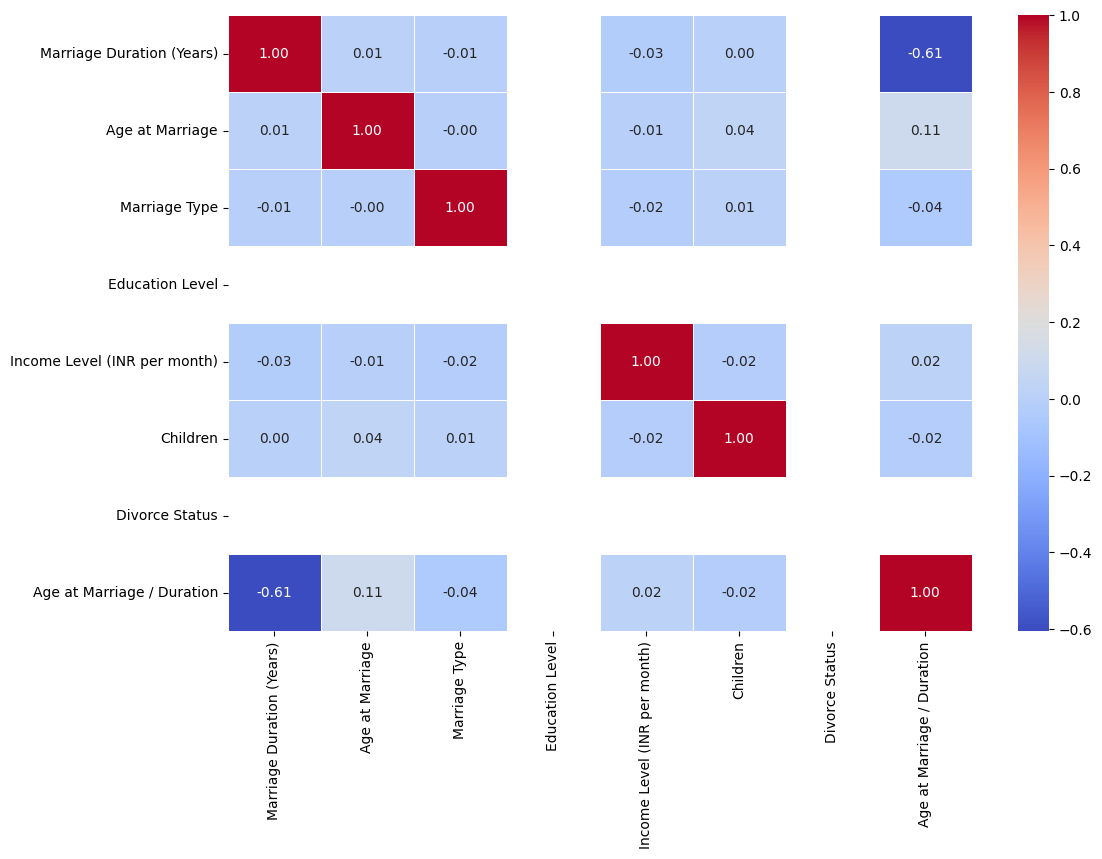


Selected Features based on Correlation:
[]


In [31]:
# Ensure all columns are numeric, and encode 'Divorce Status' if needed
df['Divorce Status'] = pd.to_numeric(df['Divorce Status'], errors='coerce')  # Convert 'Divorce Status' to numeric

# Compute the correlation matrix only for numeric columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Select features based on a correlation threshold with 'Divorce Status'
threshold = 0.3
corr_features = correlation_matrix[abs(correlation_matrix['Divorce Status']) > threshold].index.tolist()

print("\nSelected Features based on Correlation:")
print(corr_features)


In [29]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target
X = df.drop('Divorce Status', axis=1)
y = df['Divorce Status']

# One-Hot Encoding for categorical features (if any)
X_cat = X.select_dtypes(include=['object'])
X_cat = pd.get_dummies(X_cat, drop_first=True)

# Perform Chi-Square test
chi2_selector = SelectKBest(chi2, k=5)
X_new = chi2_selector.fit_transform(X_cat, y)

# Print selected features
selected_features = X_cat.columns[chi2_selector.get_support()]
print("\nFeatures selected by Chi-Square:")
print(selected_features)



Features selected by Chi-Square:
Index(['Unique ID_MD99', 'Unique ID_MD990', 'Unique ID_MD992',
       'Unique ID_MD994', 'Unique ID_MD995'],
      dtype='object')


In [32]:
# Ensure corr_features and selected_features are defined
corr_features = []  # Initialize an empty list if no features are selected by correlation
selected_features = []  # Initialize an empty list for Chi-Square features

# If features are selected by correlation, proceed with the merging
if corr_features and selected_features:
    final_selected_features = list(set(corr_features + selected_features))
else:
    # Handle case where no features were selected in one or both methods
    print("No features selected by either correlation or Chi-Square")
    final_selected_features = corr_features if corr_features else selected_features

# Print the final selected features
print("\nFinal Selected Features:")
print(final_selected_features)


No features selected by either correlation or Chi-Square

Final Selected Features:
[]


In [57]:
print("\nBefore Scaling:")
print(df['Income Level (INR per month)'].head())  # Before scaling

# Perform scaling
df['Income Level (INR per month)'] = scaler.fit_transform(df[['Income Level (INR per month)']])

print("\nAfter Scaling:")
print(df['Income Level (INR per month)'].head())  # After scaling



Before Scaling:
0    0.199340
1   -1.501156
2    1.024470
3   -0.703170
4   -1.322031
Name: Income Level (INR per month), dtype: float64

After Scaling:
0    0.199340
1   -1.501156
2    1.024470
3   -0.703170
4   -1.322031
Name: Income Level (INR per month), dtype: float64
